In [1]:
import math
import numpy as np
import codecs, json 
import cv2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import mixture
from scipy import linalg as la
from scipy import stats as st
from scipy.interpolate import griddata

In [2]:
deconv = np.zeros([8,8,8,8])
s = 0.55
for i in range(8):
    for j in range(8):
        weight = 0
        for m in range(8):
            for n in range(8):
                deconv[i,j,m,n] = math.exp(-math.pow(np.linalg.norm(np.array([i,j]-np.array([m,n])))/s,2)*0.5)
                weight += deconv[i,j,m,n]
        deconv[i,j] /= weight

deconv = np.reshape(deconv,(64,64))

In [3]:
MINTEMP = -1.
MAXTEMP = 4.
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:64j, 0:7:64j]

In [9]:
rn = 100
arr1 = np.zeros([25,rn,8,8])
for n in range(25):
    path = 'train/warm/output-2/' + str(n+1) +'.txt'
    with open(path) as f:
        for k in range(rn):
            for i in range(8):
                line = f.readline()
                t = [float(x) for x in line.split()]
                arr1[n,k,i] = t
            line = f.readline()

3.1195493286567664
3.0642655258204328
3.466350363050673
3.5030352900197053
3.5984486920922
2.6166792442661224
2.991506788783836
3.2790099139252904
3.3170370448444864
3.169549858003674
2.876397873849213
2.85603967401566
2.982846996438766
3.0269574072846686
3.561195422674177
2.846321908640486
2.8800565281400208
3.33565860219258
3.3651079232600964
3.3306068075035795
2.9200410795123664
3.020514051877362
3.1261118633195775
3.093466869428545
3.3422311669586273


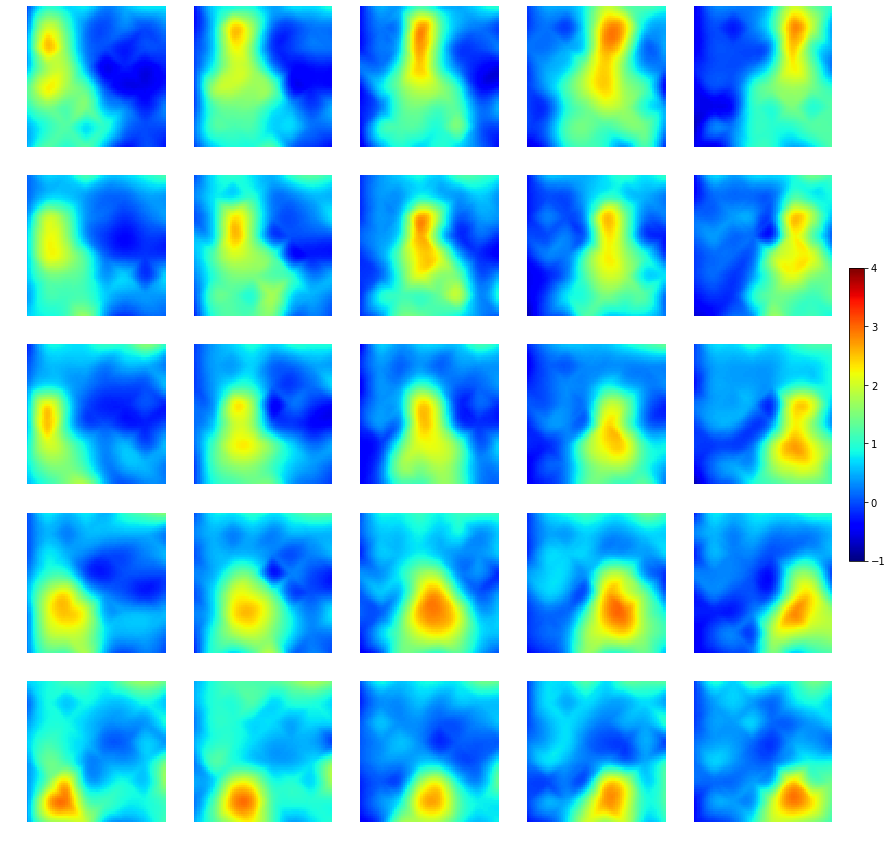

In [10]:
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for n in range(25):
    bicubic = griddata(points, np.amax(arr1[n],axis = 0).reshape(-1) -np.mean(arr1[n]), (grid_x, grid_y), method='cubic')
    ax = axs[int(n/5), int(n%5)]
    pcm = ax.pcolormesh(np.flip(bicubic,0), cmap='jet', vmin = MINTEMP, vmax = MAXTEMP)
    ax.set_axis_off()
    print(np.amax(bicubic)-np.amin(bicubic))
fig.colorbar(pcm, ax= axs[:], fraction=0.0175,pad=0.02)

plt.show()

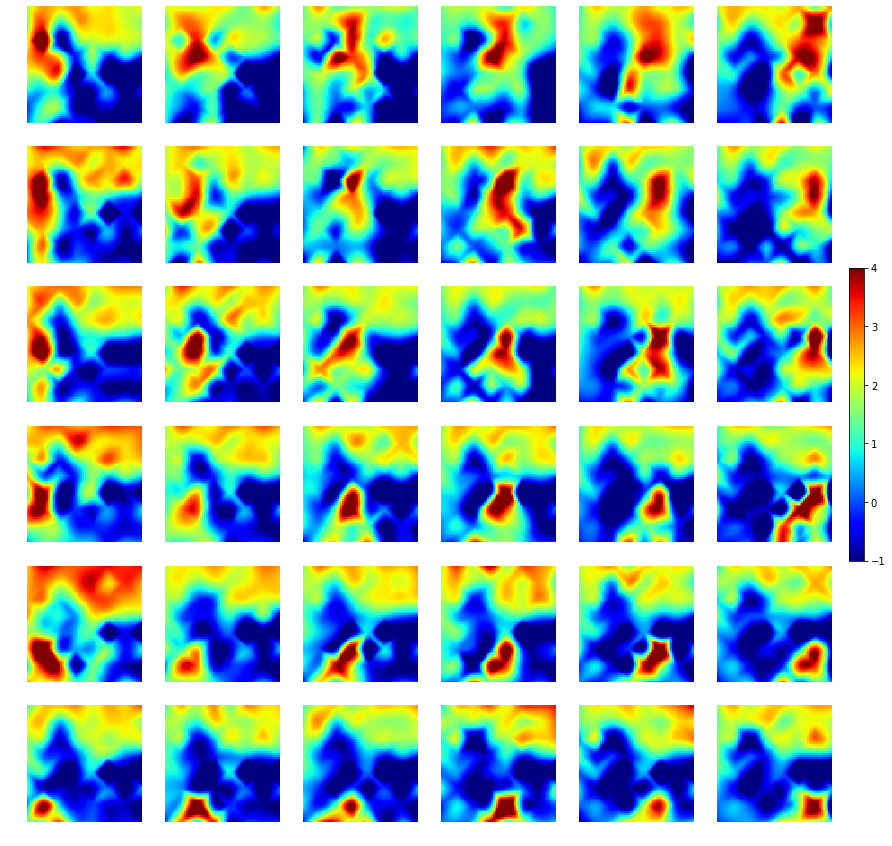

In [6]:
fig, axs = plt.subplots(6, 6, figsize=(15, 15))
for n in range(36):
    samp = np.reshape(np.amax(arr1[n],axis = 0) -np.mean(arr1[n]),(64))
    ans = np.linalg.solve(deconv,samp)
    
    bicubic = griddata(points, ans, (grid_x, grid_y), method='cubic')
    ax = axs[int(n/6), int(n%6)]
    pcm = ax.pcolormesh(np.flip(bicubic,0), cmap='jet', vmin = MINTEMP, vmax = MAXTEMP)
    ax.set_axis_off()
fig.colorbar(pcm, ax= axs[:], fraction=0.0175,pad=0.02)
#     print(np.amax(bicubic)-np.amin(bicubic))
plt.show()